# **MÓDULO 12 - Pratique**


Abaixo temos um dataframe com as seguintes informações:


**Nome:** O nome de cada indivíduo da base


**Idade:** A idade de cada um deles


**Profissão:** A atual ocupação


**Salário:** O salário registrado


**Limite de crédito:** O limite de crédito disponível para cada um dos indivíduos


**Historico_Inadimplencia:** Marco como 0 aqueles que nunca tiveram um histórico de inadimplência e como 1 aqueles que já tiveram em algum momento.


**Estado civil:** O estado civil de cada um deles


**Imovel_Proprio:** Marcado como 0 aqueles que não tem imóvel próprio e como 1 aqueles que tem.

In [201]:
import pandas as pd
import unicodedata
import matplotlib.pyplot as plt
import locale

In [203]:
locale.setlocale(locale.LC_ALL,'pt_BR.UTF-8')

'pt_BR.UTF-8'

In [205]:

data = {
    'Nome': ['Alice', 'Joao', 'Charlie', 'David', 'Eva', 'Diego', 'Denize', 'Claudio'],
    'Idade': [25, 30, 35, 40, 45, 60, 22, 24],
    'Profissão': ['Engenheiro', 'Médico', 'Professor', 'Advogado', 'Médico','Engenheiro', 'Estudante','Estudante'],
    'Salário': ['4500', '8000', '5000', '10000', '12000','15000', '1200','1500'],
    'Limite_Credito': ['2500', '4000', '4000', '1000', '10000','2000', '500','250'],
    'Historico_Inadimplencia': ['0', '0', '0', '1', '0','1', '0','1'],
    'Estado_Civil': ['Casamento', 'Casamento', 'Solteiro', 'Solteiro', 'Casamento','Solteiro', 'Solteiro','Solteiro'],
    'Imovel_Proprio': ['0', '0', '0', '1', '1','1', '0','0']
}

df = pd.DataFrame(data)
df.head(5)

,Nome,Idade,Profissão,Salário,Limite_Credito,Historico_Inadimplencia,Estado_Civil,Imovel_Proprio
0,Alice,25,Engenheiro,4500,2500,0,Casamento,0
1,Joao,30,Médico,8000,4000,0,Casamento,0
2,Charlie,35,Professor,5000,4000,0,Solteiro,0
3,David,40,Advogado,10000,1000,1,Solteiro,1
4,Eva,45,Médico,12000,10000,0,Casamento,1


A proposta da atividade é que utilizem os dados do DataFrame Data e escolham apenas 3 gráficos que ajudem vocês a identificar quais fatores são os principais impulsionadores para aqueles que tem limite de crédito alto.

Durante a exploração de vocês podem utilizar mais de 3 gráficos mas deixem na entrega final apenas os 3 mais assertivos que contenham a informação da mensagem que querem passar, fiquem livres para utilizar as bibliotecas que quiserem para os gráficos.

Justifiquem a escolha dos visuais e despertem o lado analítico de vocês com uma análise acerca do descoberto através dos gráficos. Lembrem o que aprendemos na aula, devemos ser assertivos na nossa mensagem.

In [209]:
# Função para remover acentos
def remover_acentos(texto):
    if isinstance(texto, str):  # Certifica-se de que o valor é uma string
        texto_normalizado = unicodedata.normalize('NFD', texto)
        texto_sem_acentos = ''.join(c for c in texto_normalizado if unicodedata.category(c) != 'Mn')
        return texto_sem_acentos
    return texto  # Retorna o valor original se não for string

Acima inseri uma função para remover os acentos das colunas com texto. Foi necessário importar o unicodata.


In [212]:
#Ajustar textos para precisão na analise
df['Arrumar_Profissao'] = df['Profissão'].str.strip()
df['Arrumar_Profissao'] = df['Arrumar_Profissao'].str.lower()
df['Arrumar_Historico'] = df['Historico_Inadimplencia'].apply(remover_acentos)

df['Arrumar_Nome'] = df['Nome'].str.strip()
df['Arrumar_Nome'] = df['Arrumar_Nome'].str.lower()
df['Arrumar_Nome'] = df['Arrumar_Nome'].apply(remover_acentos)

df['Arrumar_EstCivil'] = df['Estado_Civil'].str.strip()
df['Arrumar_EstCivil'] = df['Arrumar_EstCivil'].str.lower()
df['Arrumar_EstCivil'] = df['Arrumar_EstCivil'].apply(remover_acentos)

Acima formatei todos os textos para minusculo nas colunas de texto para evitar erro ao remover duplicados na funçoes seguintes.

In [215]:
#Mèdia de Salário por Profissão
df['media_SalarioProf'] = pd.to_numeric(df['Salário'], errors='coerce')
media_salarioProfiss = df.groupby(['Arrumar_Profissao'])['media_SalarioProf'].mean()
# print(media_salarioProfiss)
df_mediaprofSalario = media_salarioProfiss.reset_index()

#Media de Crédito por Profissão
df['media_LimitecreditoProf'] = pd.to_numeric(df['Limite_Credito'], errors='coerce')
media_profLimite= df.groupby('Arrumar_Profissao')['media_LimitecreditoProf'].mean()
df_mediaProfLimite = media_profLimite.reset_index()

#Media Imovel próprio por profissão
df['media_ImovelProf'] = pd.to_numeric(df['Imovel_Proprio'], errors='coerce')
media_imovelProprio = df.groupby('Arrumar_Profissao')['media_ImovelProf'].mean()
df_mediaImovelProprio = media_imovelProprio.reset_index()

#Média de casados por profissão
df['media_casadosProf'] = df['Arrumar_EstCivil'].apply(lambda x: 1 if x == 'casamento' else 0)
media_casadoProf = df.groupby('Arrumar_Profissao')['media_casadosProf'].mean()*300
df_mediaCasadoProf = media_casadoProf.reset_index()

#Média de Solteiros por profissão
df['media_solteiroProf'] = df['Arrumar_EstCivil'].apply(lambda x: 1 if x == 'solteiro' else 0)
media_solteiroProf = df.groupby('Arrumar_Profissao')['media_solteiroProf'].mean()*300
df_mediaSolteiroProf = media_solteiroProf.reset_index()

#Média de Inadimplencia por profissão
df['media_InadplProf'] = pd.to_numeric(df['Historico_Inadimplencia'], errors='coerce')
media_inadinplente = df.groupby('Arrumar_Profissao')['media_InadplProf'].mean()
df_media_inadinplente = media_inadinplente.reset_index()

Acima apliquei a função df.groupby() para remover os duplicado e a função mean() para trazer as médias respectivas para cada coluna de texto.
Para médias de Casados e Solteiros precisei palicar um apply e criar colunas separadas para casados e solteiros.
OBS: Para valores com médias muito pequenas, multipliquei por 300 para, apenas, aparecer no gráfico.

In [218]:
#Combina os DataFrames usando o pd.merge e a coluna "Arrumar_Profissao" como referência
df_combinado = pd.merge(df_mediaprofSalario, df_mediaProfLimite, on='Arrumar_Profissao', how='inner')
df_combinado = pd.merge(df_combinado, df_mediaImovelProprio, on='Arrumar_Profissao', how='inner')
df_combinado = pd.merge(df_combinado, df_mediaCasadoProf, on='Arrumar_Profissao', how='inner')
df_combinado = pd.merge(df_combinado, df_mediaSolteiroProf, on='Arrumar_Profissao', how='inner')
df_combinado = pd.merge(df_combinado, df_media_inadinplente, on='Arrumar_Profissao', how='inner')

Acima combinei os dataframes considerando como referência a profissão, criando assim colunas de valores numéricos para cada média de cada item conforme colunas fornecidas na atividade.

In [221]:
#Gerar novo arquivo csv com os dados de média já resumidos
df_combinado.to_csv('Analise_Médias_RefProfissão.csv')

Acima gerei um novo arquivo para ser meu dataframe, já resumido, apenas, com os de média para cada item da atividade.

In [224]:
#Ler dados do novo arquivo
df = pd.read_csv('Analise_Médias_RefProfissão.csv')

In [226]:
#Formatar Colunas não numéricas para numéricas, conforme necessário.
df['EleverMedia_Imovel'] = pd.to_numeric(df['media_ImovelProf'], errors='coerce')
df['EleverMedia_Imovel'] = df['EleverMedia_Imovel'] * 300

df['EleverMedia_inadiplente'] = pd.to_numeric(df['media_InadplProf'], errors='coerce')
df['EleverMedia_inadiplente'] = df['EleverMedia_inadiplente'] * 300

Acima precisei tratar os dados das colunas "Média imóvel" e "Média Inadiplências" e, por serem valores muito pequenos, multipliquei por 300, também.

In [229]:
#Maior salario meédio
maiorMediasalario = df['media_SalarioProf'].max()+3000

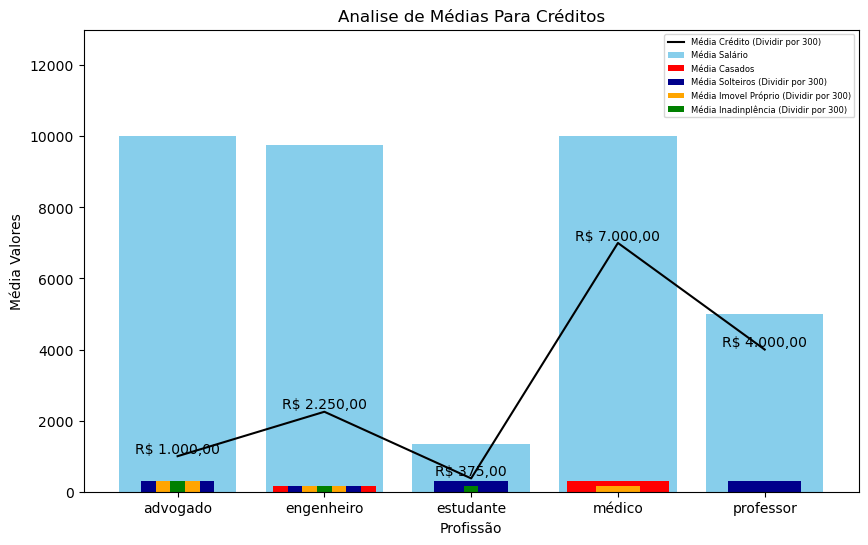

In [231]:
#Gerar Gráficos comparativos
plt.figure(figsize=(10, 6))

mediaCredito= df['media_LimitecreditoProf']
for i, valor in enumerate(mediaCredito):
    valor_moeda = locale.currency(valor, grouping=True)
    plt.text(i, valor, valor_moeda, ha='center', va='bottom', fontsize=10)

plt.bar(df['Arrumar_Profissao'],df['media_SalarioProf'], color='skyblue', label='Média Salário')
plt.bar(df['Arrumar_Profissao'],df['media_casadosProf'], width=0.7, color='red', label='Média Casados')
plt.bar(df['Arrumar_Profissao'],df['media_solteiroProf'], width=0.5, color='darkblue', label='Média Solteiros (Dividir por 300)')
plt.bar(df['Arrumar_Profissao'],df['EleverMedia_Imovel'], width=0.3, color='orange', label='Média Imovel Próprio (Dividir por 300)')
plt.bar(df['Arrumar_Profissao'],df['EleverMedia_inadiplente'], width=0.1, color='green', label='Média Inadinplência (Dividir por 300)')
plt.plot(df['Arrumar_Profissao'],df['media_LimitecreditoProf'], color='black', label='Média Crédito (Dividir por 300)')

plt.title('Analise de Médias Para Créditos')
plt.legend(loc='upper right', fontsize=6)
plt.xlabel('Profissão')
plt.ylim(0,maiorMediasalario)
plt.ylabel('Média Valores')
plt.show()

------ Abaixo vou começar a analisar só os dados do melhor colocado para verificar no detalhe o perfil dos clientes que estão puxando pra cima o limete de Crédito ------

In [234]:
#Armazenar dataframe principal
df_data = pd.DataFrame(data)

In [236]:
#Ordenar e Pegar o primeiro colocado apos ordenar ordenar decrescente
primeiro_colocado = df.sort_values(by='media_LimitecreditoProf', ascending=False).iloc[0]

In [237]:
#Pegar profissão do primeiro colocado para referencia do filtro posterior
prof_primeiro_colocado = primeiro_colocado['Arrumar_Profissao']

In [238]:
#Filtrar df_data considerando profissão do primeiro colocado
filtro = df_data[df_data['Profissão'].str.contains(prof_primeiro_colocado, case=False)]  # case=False para ignorar maiúsculas/minúsculas

In [248]:
#Criar DataFrame do Filtro
df_filtro = pd.DataFrame(filtro)

In [250]:
#criar coluna para somar estado civil casados
df_filtro['casado'] = df_filtro['Estado_Civil'].apply(lambda x: 1*300 if x == 'Casamento' else 0)
df_filtro['casado'] = pd.to_numeric(df_filtro['casado'])


In [252]:
#criar coluna para somar solteiros
df_filtro['solteiro'] = df_filtro['Estado_Civil'].apply(lambda x: 1*300 if x == 'Solteiro' else 0)
df_filtro['solteiro'] = pd.to_numeric(df_filtro['solteiro'])

In [254]:
#Passar valores texto para numérico
df_filtro['Salário'] = pd.to_numeric(df_filtro['Salário'])
df_filtro['Limite_Credito'] = pd.to_numeric(df_filtro['Limite_Credito'])
df_filtro['Imovel_Proprio'] = pd.to_numeric(df_filtro['Imovel_Proprio']) * 300 #*300 para valore aparecer no gráfico
df_filtro['Historico_Inadimplencia'] = pd.to_numeric(df_filtro['Historico_Inadimplencia']) * 300 #*300 para valore aparecer no gráfico

In [256]:
#Criar estrutura do gráfico
plt.figure(figsize=(10, 6))


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [258]:
#Pegar valor máximo de salário
salario_max = float(df_filtro['Salário'].max())+3000

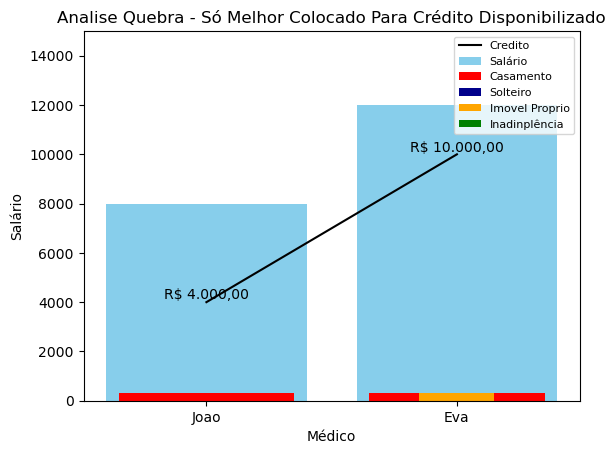

In [260]:
#inserir rótulo "Limite de Crédito"
mediaCredito= df_filtro['Limite_Credito']
for i, valor in enumerate(mediaCredito):
    valor_formatado = locale.currency(valor, grouping=True)
    plt.text(i, valor, valor_formatado, ha='center', va='bottom', fontsize=10)

#inserir gráfico de barras
plt.bar(df_filtro['Nome'],df_filtro['Salário'], color ='skyblue', label='Salário')
plt.bar(df_filtro['Nome'],df_filtro['casado'],width=0.7,color='red',label='Casamento')
plt.bar(df_filtro['Nome'],df_filtro['solteiro'],width=0.5,color='darkblue',label='Solteiro')
plt.bar(df_filtro['Nome'],df_filtro['Imovel_Proprio'], width=0.3, color='orange', label='Imovel Proprio')
plt.bar(df_filtro['Nome'],df_filtro['Historico_Inadimplencia'], width=0.1,color='green', label='Inadinplência')
plt.plot(df_filtro['Nome'],df_filtro['Limite_Credito'], color='black', label='Credito')

#estabelacer os critérios do eiixo y
plt.ylabel('Salário')
plt.ylim(0,salario_max)
#estabelacer os critérios de x
profissao = prof_primeiro_colocado.capitalize()
plt.xlabel(profissao)

plt.title('Analise Quebra - Só Melhor Colocado Para Crédito Disponibilizado')
plt.legend(loc='upper right',fontsize=8)

plt.show()

In [262]:
print(df_filtro)

   Nome  Idade Profissão  Salário  Limite_Credito  Historico_Inadimplencia  \
1  Joao     30    Médico     8000            4000                        0   
4   Eva     45    Médico    12000           10000                        0   

  Estado_Civil  Imovel_Proprio  casado  solteiro  
1    Casamento               0     300         0  
4    Casamento             300     300         0  


Esta analise me premitiu mais afundo enteder quais dos clientes estão puxando a média de crédito favoravelemte para cima para os clientes com a profissão de Médico. 
Pude ver que a cliente, Eva, e o Cliente, Jão, possuem um nome sem restrição e ambos são casados, porém, Eva, tem um sálário 1.5 percentual acima de João e, também, tem um imóvel em seu nome isso permite a eva um Crédito disponível de 2.50 percentual maior que João.
O Salário da Eva é 1.5 percentual maior que o do João, ou seja o fato de ter um imóvel próprio tem um impacto muito forte na hora do sistema do banco liberar disponibilizar seu limete de crédito.

------ Dos Advogados me chamou atenção, msm com bom salário o nível de crédito está bem ruim, vou analizarlo mais a fundo Abaixo ------

In [266]:
#Filtrar df_data considerando profissão do primeiro colocado
filtro = df_data[df_data['Profissão'].str.contains('advogado', case=False)]  # case=False para ignorar maiúsculas/minúsculas

In [268]:
#Criar DataFrame do Filtro
df_filtro = pd.DataFrame(filtro)

In [270]:
#criar coluna para somar estado civil casados
df_filtro['casado'] = df_filtro['Estado_Civil'].apply(lambda x: 1*300 if x == 'Casamento' else 0)
df_filtro['casado'] = pd.to_numeric(df_filtro['casado'])

In [272]:
#criar coluna para somar solteiros
df_filtro['solteiro'] = df_filtro['Estado_Civil'].apply(lambda x: 1*300 if x == 'Solteiro' else 0)
df_filtro['solteiro'] = pd.to_numeric(df_filtro['solteiro'])

In [274]:
#Passar valores texto para numérico
df_filtro['Salário'] = pd.to_numeric(df_filtro['Salário'])
df_filtro['Limite_Credito'] = pd.to_numeric(df_filtro['Limite_Credito'])
df_filtro['Imovel_Proprio'] = pd.to_numeric(df_filtro['Imovel_Proprio']) * 300 #*300 para valore aparecer no gráfico
df_filtro['Historico_Inadimplencia'] = pd.to_numeric(df_filtro['Historico_Inadimplencia']) * 300 #*300 para valore aparecer no gráfico

In [276]:
#Criar estrutura do gráfico
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [278]:
#Pegar valor máximo de salário
salario_max = float(df_filtro['Salário'].max())+3000

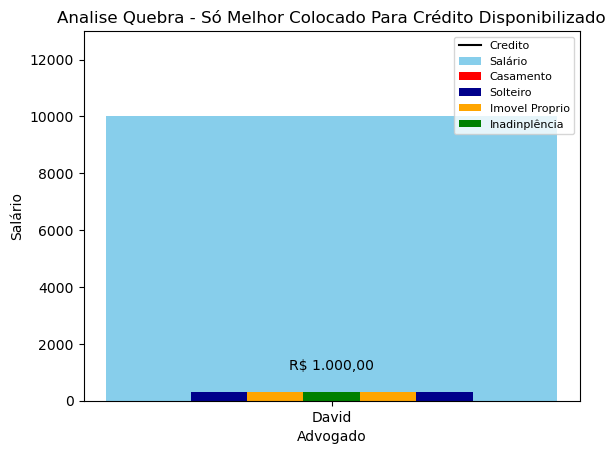

In [283]:
#inserir rótulo "Limite de Crédito"
mediaCredito= df_filtro['Limite_Credito']
for i, valor in enumerate(mediaCredito):
    valor_formatado = locale.currency(valor, grouping=True)
    plt.text(i, valor, valor_formatado, ha='center', va='bottom', fontsize=10)

#inserir gráfico de barras
plt.bar(df_filtro['Nome'],df_filtro['Salário'], color ='skyblue', label='Salário')
plt.bar(df_filtro['Nome'],df_filtro['casado'],width=0.7,color='red',label='Casamento')
plt.bar(df_filtro['Nome'],df_filtro['solteiro'],width=0.5,color='darkblue',label='Solteiro')
plt.bar(df_filtro['Nome'],df_filtro['Imovel_Proprio'], width=0.3, color='orange', label='Imovel Proprio')
plt.bar(df_filtro['Nome'],df_filtro['Historico_Inadimplencia'], width=0.1,color='green', label='Inadinplência')
plt.plot(df_filtro['Nome'],df_filtro['Limite_Credito'], color='black', label='Credito')

#estabelacer os critérios do eiixo y
plt.ylabel('Salário')
plt.ylim(0,salario_max)
#estabelacer os critérios de x
profissao = prof_primeiro_colocado.capitalize()
plt.xlabel('Advogado')

plt.title('Analise Quebra - Só Melhor Colocado Para Crédito Disponibilizado')
plt.legend(loc='upper right',fontsize=8)

plt.show()

Entendi, só tem 1 advogado no dataframe e o David mesmo possuindo 1 imóvel é solteiro e tem restrição registrada em seu nome.
Mesmo com o bom salário e com imóvel em seu nome, o fato de ter uma inadiplência tem um peso contrário gigantesco.
O David Comparado com a Eva tem um salário 1.2 percentual abaixo da Eva, porém, um crédito 10x menor que a Eva.